# Révision

In [2]:
import numpy as np
from scipy.ndimage import correlate, convolve
import matplotlib.pyplot as plt
import imageio

## Question 1
Quelle serait le résultat d'une convolution entre **img** et le kernel **filter**? (en utilisant un padding de 0)
> Essayez de le faire à la main

In [3]:
img = [
    [1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 1, 0],
    [0, 0, 0, 0, 1],
]

filter = [
    [2, 0, 0],
    [0, -1, 0],
    [0, 0, 0],
]

result = convolve(np.array(img), filter, mode="constant", cval=0)
#print(result)

## Question 2
Expliquer la transformer de fourier de **img**

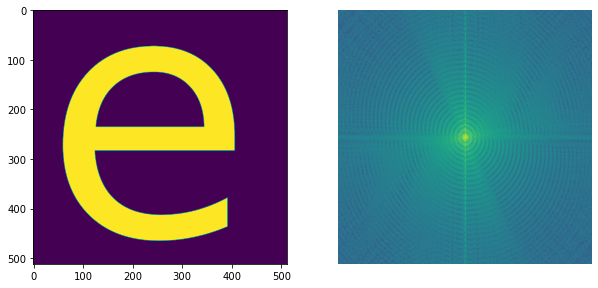

In [80]:
img = imageio.imread("e.png").mean(axis=2)
img = img / img.max()

plt.figure(figsize=(10,10))
plt.subplot(121); plt.imshow(img)

fft = np.fft.fft2(img)
plt.subplot(122); plt.imshow(np.log(np.abs(np.fft.fftshift(fft)) + 1e-6)); plt.axis('off')

plt.show()

## Observation: détramage d'un effet Moiré
Les étapes que j'avais fais pour restaurer cette image:
<img src="img.PNG" width="30%"
     alt="Error can't fetch img" />

1. Passer au domaine fréquentiel et mettre les basses fréquences au centre:
<img src="fft.PNG" width="30%"
     alt="Error can't fetch img" />

2. Appliquer un threshold de sorte à segmenter les étoiles
<img src="threshold.PNG" width="30%"
     alt="Error can't fetch img" />

3. Créer un masque qui retire les étoiles, mais qui conserve les basses fréquences (nos détails)
<img src="mask.PNG" width="30%"
     alt="Error can't fetch img" />

4. Multiplier notre transformer de Fourier avec notre masque (inversé) et revenir au domaine fréquentiel avec l'inverse de Fourier
<img src="result.PNG" width="30%"
     alt="Error can't fetch img" />